# Análisis Exploratorio de Datos del Set 'Walking'
## Carga de Datos

In [1]:
import numpy as np 
import pandas as pd 
import os

walking_df = pd.read_csv("IJBA-2023-01-22.walking.csv", delimiter=";", decimal=",")

walking_df.head()

,time,gFx,gFy,gFz,TgF,Actividad,movil,sujeto
0,0.000789,-0.0371,1.0348,-0.0112,1.036,walking,Samsung Galaxy S10,Isaías
1,0.003969,-0.0315,1.0302,-0.0159,1.031,walking,Samsung Galaxy S10,Isaías
2,0.008784,-0.0293,1.0251,-0.0081,1.026,walking,Samsung Galaxy S10,Isaías
3,0.015694,-0.0345,1.0187,0.0066,1.019,walking,Samsung Galaxy S10,Isaías
4,0.019359,-0.0420,1.0168,0.0159,1.018,walking,Samsung Galaxy S10,Isaías


In [2]:
# Duración total del dataset
duration = walking_df['time'][walking_df.index[-1]]

# Frecuencia de muestreo (s^-1)
fs = walking_df[ (walking_df['time']>0) & (walking_df['time']<1) ]['TgF'].count()

# Intervalo en milisegundos entre cada muestra
interval = (1/fs) * 1000

print("%.1f seconds serie, interval between consecutive points = %.1f milliseconds" % (duration, interval))

11.0 seconds serie, interval between consecutive points = 5.1 milliseconds


In [3]:
# Cambiamos el índice a la columna 'time'
walking_df.set_index('time', inplace = True)
walking_df.head()

,gFx,gFy,gFz,TgF,Actividad,movil,sujeto
time,,,,,,,
0.000789,-0.0371,1.0348,-0.0112,1.036,walking,Samsung Galaxy S10,Isaías
0.003969,-0.0315,1.0302,-0.0159,1.031,walking,Samsung Galaxy S10,Isaías
0.008784,-0.0293,1.0251,-0.0081,1.026,walking,Samsung Galaxy S10,Isaías
0.015694,-0.0345,1.0187,0.0066,1.019,walking,Samsung Galaxy S10,Isaías
0.019359,-0.0420,1.0168,0.0159,1.018,walking,Samsung Galaxy S10,Isaías


## Análisis Exploratorio de Datos
### Gráficos de Evolución Temporal
El siguiente gráfico muestra la evolución de la aceleración en cada una de las tres dimensiones (x, y, z) y su sumatorio.

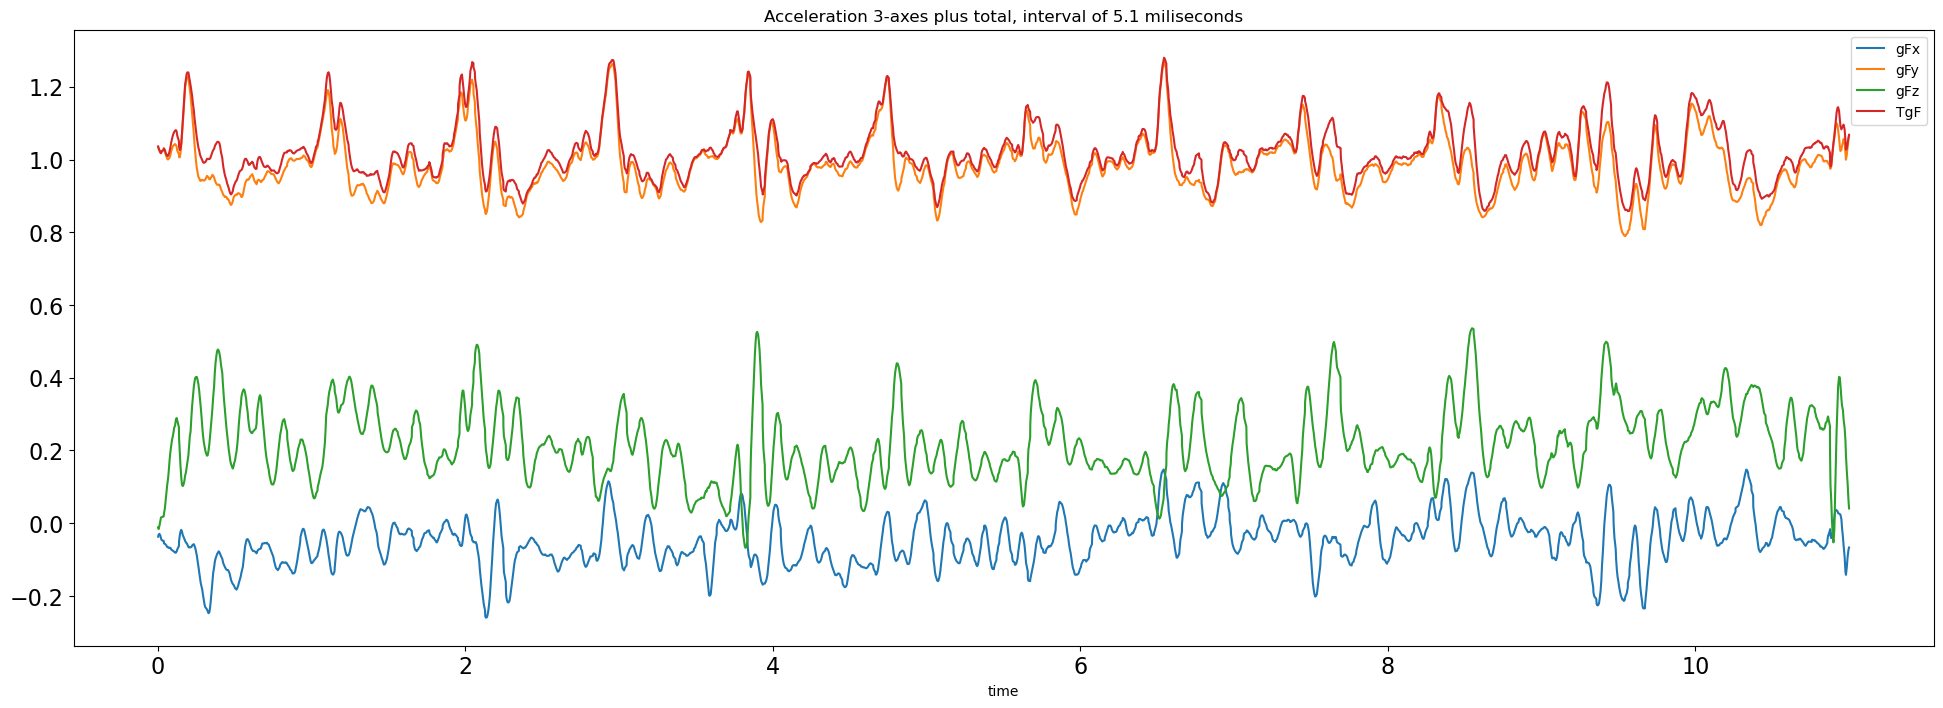

In [4]:
import matplotlib.pyplot as plt
from pylab import rcParams

rcParams['figure.figsize'] = 24, 8
walking_df.plot(title="Acceleration 3-axes plus total, interval of %.1f miliseconds" % interval, fontsize=16)
plt.show()

En el gráfico superior podemos observar que:
- La fuerza ejercida en el eje X se mueve con cierta periodicidad entre -0.2 y 0.0, centrado sobre -0.1.
- La fuerza ejercida en el eje Y se mueve con cierta periodicidad entre 0.9 y 1.2, centrado sobre 1.0.
- La fuerza ejercida en el eje Z se mueve con cierta periodicidad entre 0.0 y 0.4, centrado sobre 0.2.
- La fuerza total se mueve con cierta periodicidad entre 0.9 y 1.2, centrado sobre 1.0.
- Durante el primer segundo, así como los dos últimos, se observan fluctuaciones anómalas e irregulares debidas a la manipulación del dispositivo detector.

Por las razones expuestas, y para poder seguir realizando el EDA con datos representativos y de calidad, limpiaremos el dataset de dichas fluctuaciones.

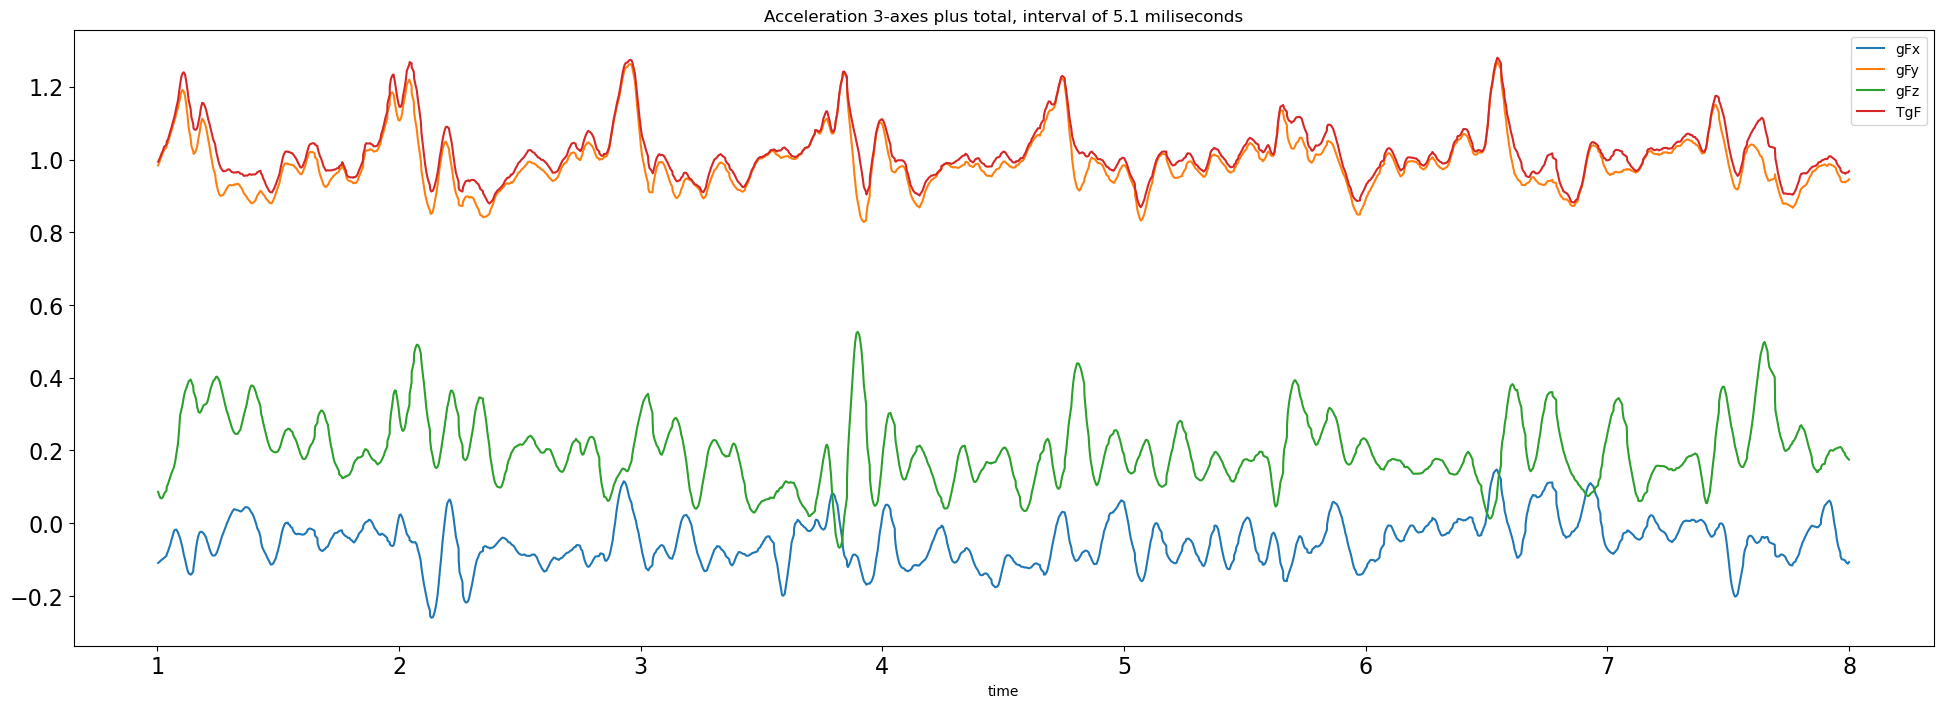

In [5]:
# Eliminamos los primeros y últimos segundos
walking_df = walking_df.loc[1:8][:]

# Graficamos de nuevo para ver el resultado
rcParams['figure.figsize'] = 24, 8
walking_df.plot(title="Acceleration 3-axes plus total, interval of %.1f miliseconds" % interval, fontsize=16)
plt.show()

### Histograma de las Cuatro Señales de Aceleración
Cada gráfico muestra el histograma de cada una de las cuatro aceleraciones.

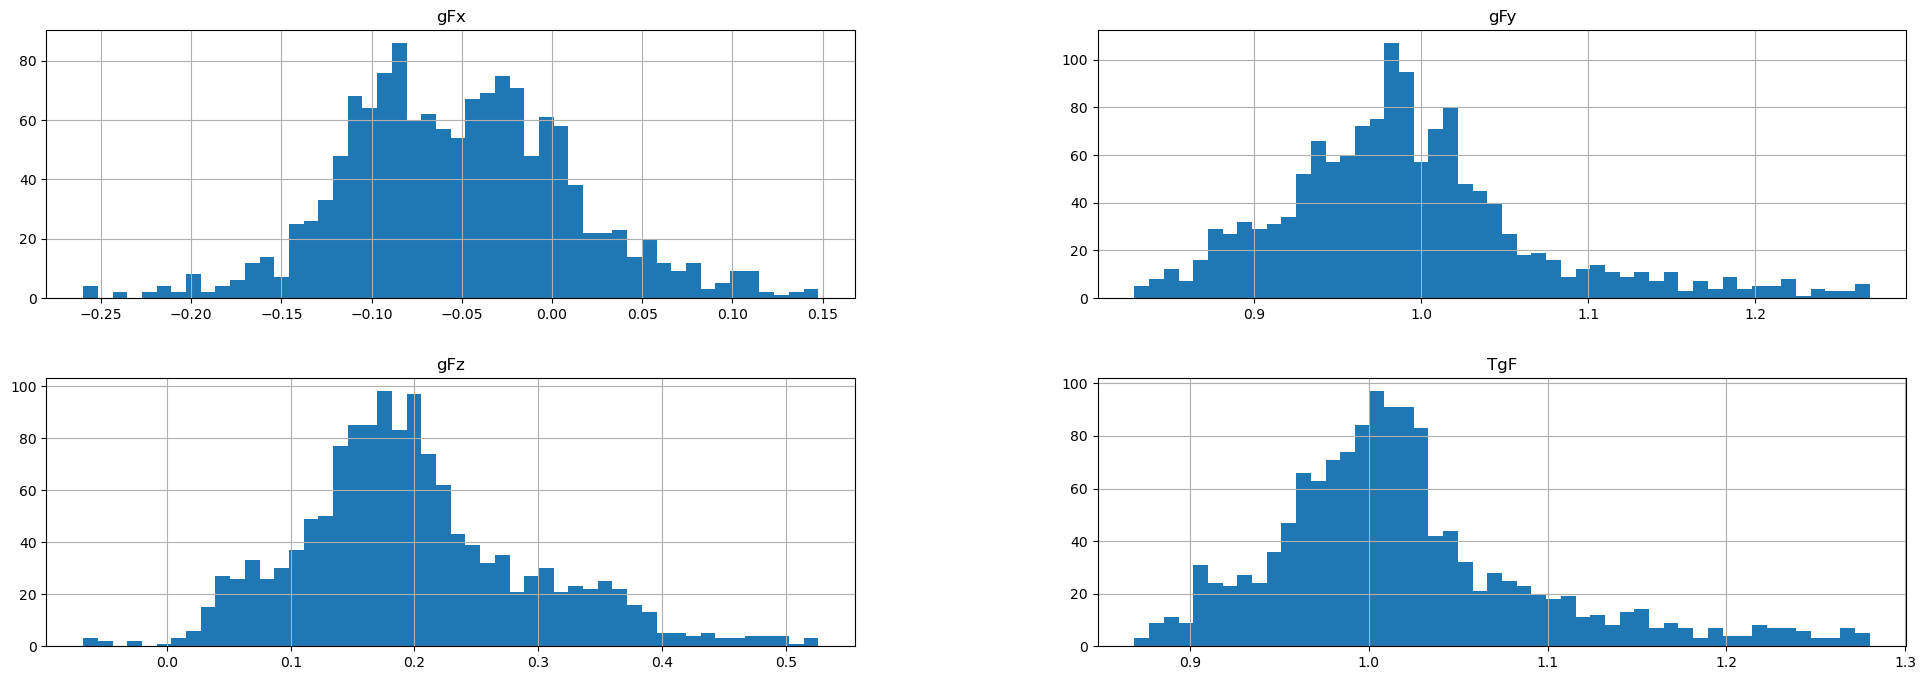

In [6]:
walking_df.hist(bins=50)
plt.show()

In [7]:
walking_df.describe()

,gFx,gFy,gFz,TgF
count,1381.000000,1381.000000,1381.000000,1381.000000
mean,-0.051618,0.991686,0.198756,1.019269
std,0.063156,0.077340,0.094930,0.075248
min,-0.259900,0.828100,-0.067700,0.869000
25%,-0.094800,0.942200,0.140000,0.971000
50%,-0.052500,0.984500,0.186600,1.008000
75%,-0.011200,1.023600,0.248200,1.046000
max,0.147600,1.268600,0.526200,1.280000


En el gráfico superior y en la tabla con la estadística descriptiva del set, podemos observar que:
- La fuerza ejercida en el eje X tiene una distribución aproximadamente normal, con una media de -0.054 y una mediana de -0.060.
- La fuerza ejercida en el eje Y tiene una distribución asimétrica positiva (la distribución tiene más valores diferentes a la derecha de la mediana que a su izquierda), con una media de 0.991 y una mediana de 0.985. 
- La fuerza ejercida en el eje Z tiene una distribución aproximadamente normal, con una media de 0.191 y una mediana de 0.179.
- La fuerza total tiene una distribución asimétrica positiva (la distribución tiene más valores diferentes a la derecha de la mediana que a su izquierda), con una media de 1.018 y una mediana de 1.008.

### Gráficos de funciones de densidad de probabilidad de señales de vibración
El KDE Plot descrito como Kernel Density Estimate se utiliza para visualizar la Densidad de Probabilidad de una variable continua.

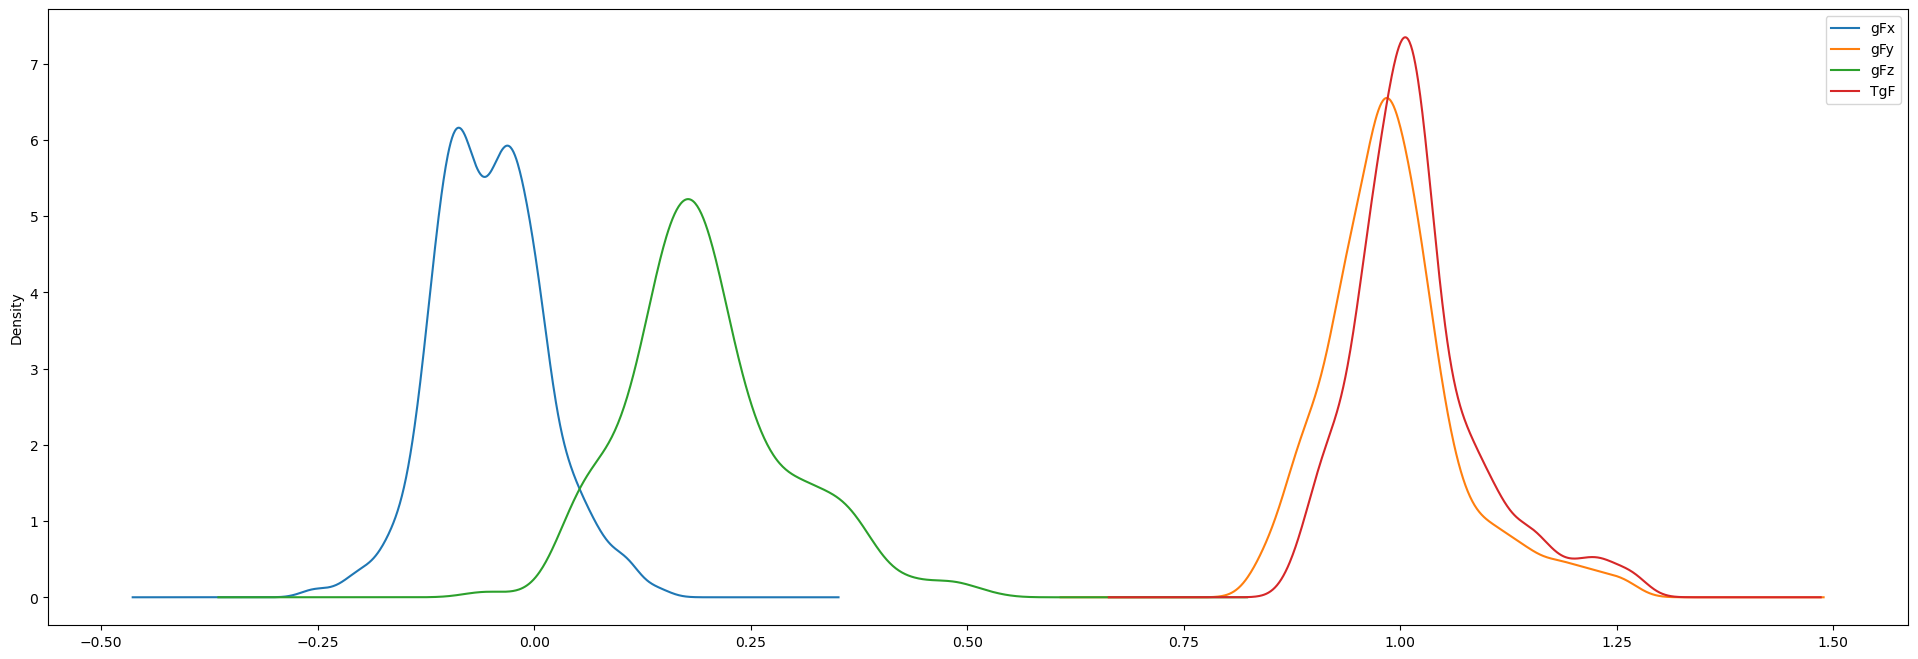

In [8]:
walking_df.plot(kind='kde')
plt.show()

En el gráfico podemos ver de otra forma las conclusiones ya expuestas en el punto anterior.

### Autocorrelación de los Ejes
#### Lag Plot
Un lag plot es un gráfico que se utiliza para detectar patrones de dependencia temporal en una serie de tiempo. Consiste en trazar cada valor de una serie de tiempo contra el valor que le sigue inmediatamente.

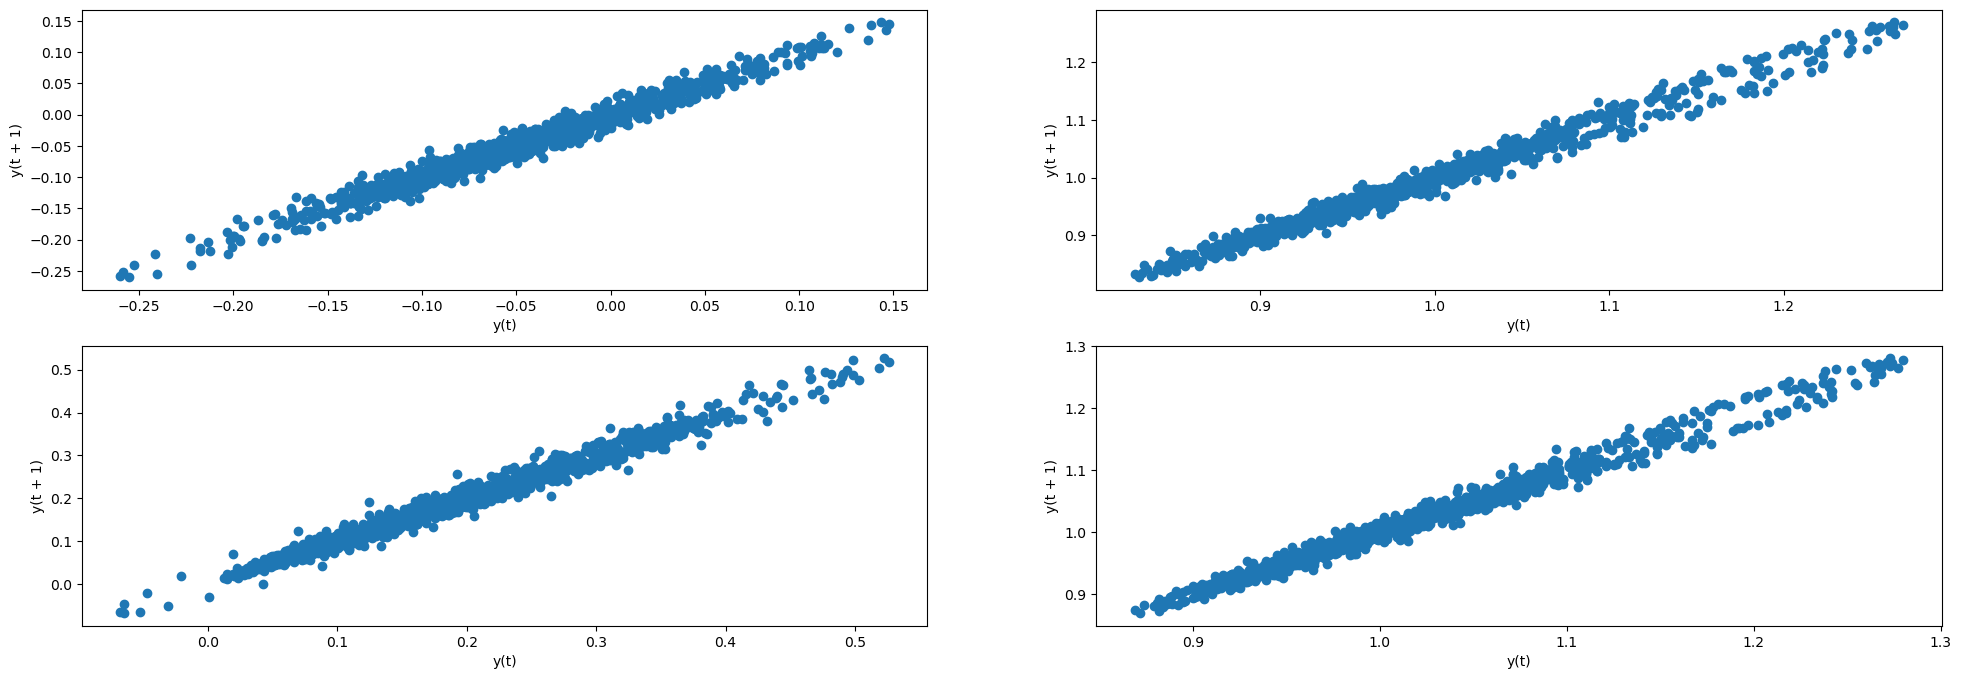

In [9]:
from pandas.plotting import lag_plot

fig, axs = plt.subplots(2, 2)
lag_plot(walking_df['gFx'], ax=axs[0, 0])
lag_plot(walking_df['gFy'], ax=axs[0, 1])
lag_plot(walking_df['gFz'], ax=axs[1, 0])
lag_plot(walking_df['TgF'], ax=axs[1, 1])
plt.show()


Como se puede observar, los puntos están distribuidos alrededor de una línea diagonal, lo que indica que los valores en una posición específica de la serie de tiempo están relacionados con los valores en una posición específica en el futuro de forma positiva.

#### Autocorrelation Plot
Un autocorrelation plot (ACF) es un gráfico que se utiliza para medir la dependencia temporal entre los valores de una serie de tiempo. El gráfico muestra la autocorrelación entre los valores de una serie de tiempo a diferentes desplazamientos (o retrasos) llamados lags.

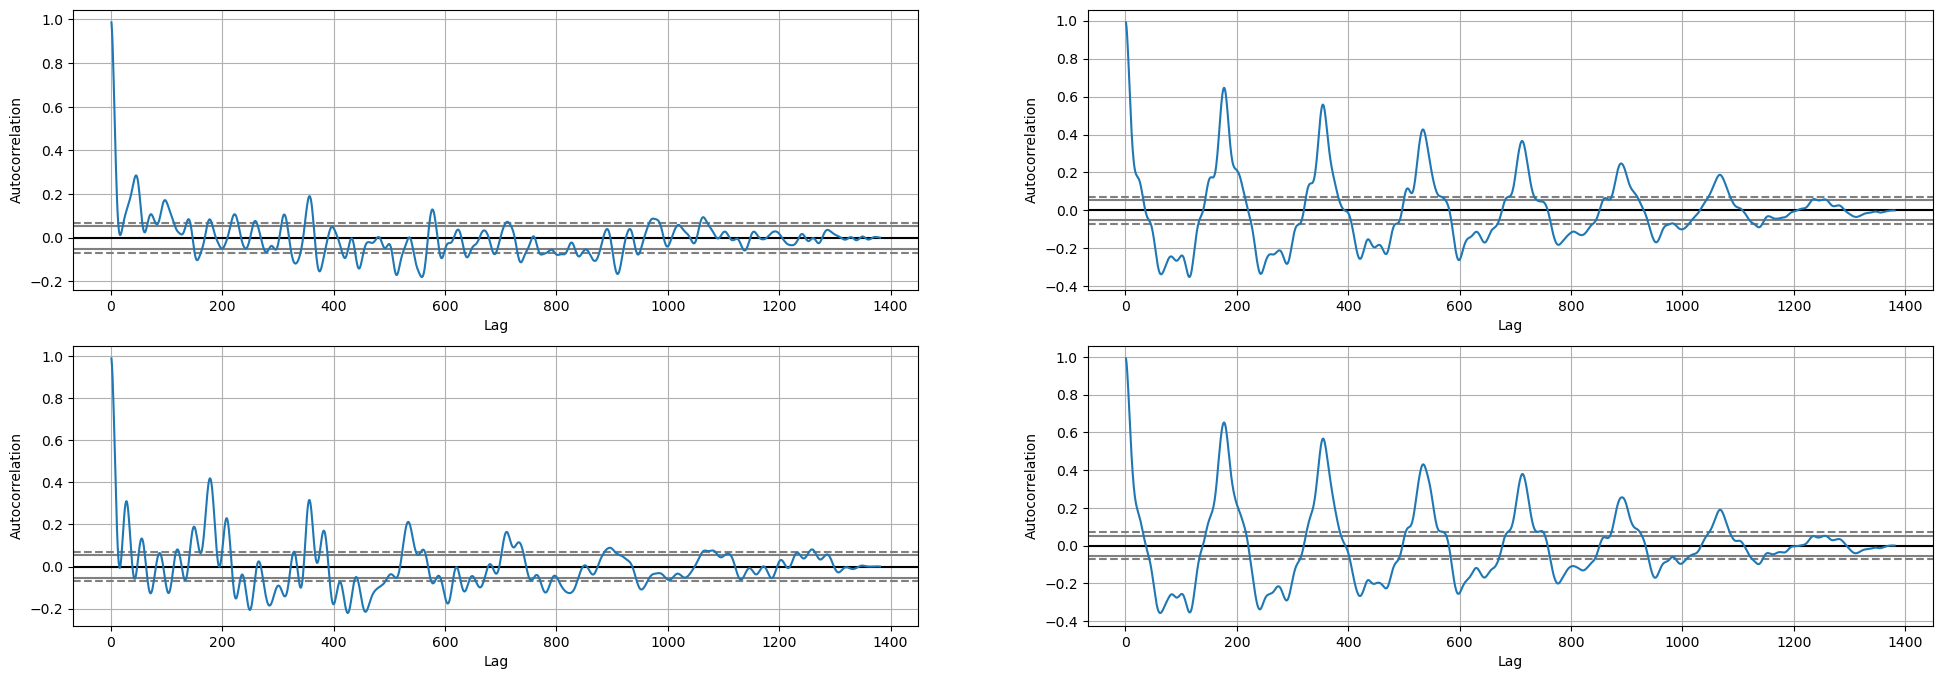

In [10]:
from pandas.plotting import autocorrelation_plot

fig, axs = plt.subplots(2, 2)
autocorrelation_plot(walking_df['gFx'], ax=axs[0, 0])
autocorrelation_plot(walking_df['gFy'], ax=axs[0, 1])
autocorrelation_plot(walking_df['gFz'], ax=axs[1, 0])
autocorrelation_plot(walking_df['TgF'], ax=axs[1, 1])
plt.show()

En los gráficos anteriores observamos ondas periódicas centradas en el cero, lo que indica que la serie de tiempo tiene un patrón estacional (que se repite cada cierto periodo). Donde se puede apreciar más significativamente es en los plots relativos al eje Y y a la fuerza total, donde la periodicidad es perceptible a simple vista y de forma diferenciada. Podemos ver también que a medida que aumenta el lag, la correlación va siendo cada vez menor, lo cual es lógico porque las pequeñas diferencias acumuladas van interfiriendo cada vez más.